In [1]:
from google.colab import drive
import torch
import torchvision.transforms as T
import torchvision.datasets as dset
from torch.utils.data import DataLoader
import torch.nn as nn
import numpy as np
import torch.optim as optim
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%ls

drive/  sample_data/


In [3]:
%cd drive

/content/drive


In [4]:
%ls

MyDrive/  Shareddrives/


In [5]:
%cd MyDrive

/content/drive/MyDrive


In [6]:
%ls

'103121@stu.flps.tp.edu.tw 2020-06-06 14:14'/            'stanCode java homework3'/
 1684493930243-769f4ffd-35d4-4948-969a-630c59b94808.jpg  'stancode SC101文章.gdoc'
 1684497838245-46e88381-df59-4516-b7f5-69e3ce2d2db2.jpg  'stancode SC201 Assignments'/
 57屆六年級沙龍/                                          寄居姬蛛對宿主選擇專一性之探討-右邊.pdf
 a0_陳上睿.zip                                           '寄居姬蛛對宿主選擇專一性之探討-左 邊.pdf'
 a1_陳上睿.zip                                            常春藤GEPT/
'a2_陳上睿 (1).zip'                                       我的照片
 a2_陳上睿.zip                                           '未命名文件 (1).gdoc'
 a3_陳上睿.zip                                           '未命名文件 (2).gdoc'
 a4_陳上睿.zip                                           '未命名文件 (3).gdoc'
 a5_陳上睿.zip                                           '未命名文件 (4).gdoc'
 a6_陳上睿.zip                                           '未命名文件 (5).gdoc'
'Arena Of Valor Program .gdoc'                           '未命名文件 (6).gdoc'
 Classroom/                             

In [7]:
%cd Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [8]:
%ls

SC201Assignment4_2/  SC201L13/  SC201L14/  SC201L15/  SC201L16/  Untitled0.ipynb


In [9]:
%cd SC201L15/

/content/drive/MyDrive/Colab Notebooks/SC201L15


In [10]:
%ls

cat_dog.ipynb  train/  val/


In [11]:
# Check if gpu is available
if torch.cuda.is_available():
  device = torch .device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [12]:
import torchvision.datasets as dset
train_data = dset.ImageFolder('train')
val_data = dset.ImageFolder('val')

In [13]:
train_data

Dataset ImageFolder
    Number of datapoints: 1025
    Root location: train

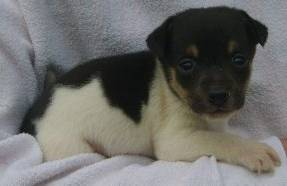

In [14]:
train_data[800][0]

In [15]:
SIZE = 224

In [16]:
# Data Preprocessing: re-size images to SIZE x SIZE and convert image to tensor
transform = T.Compose([T.Resize((SIZE, SIZE)), T.ToTensor(), T.RandomHorizontalFlip(), T.RandomAutocontrast(), T.RandomAdjustSharpness(sharpness_factor=2)])

In [17]:
# Load data in train and val from out google drive
train_data = dset.ImageFolder('train', transform=transform)
val_data = dset.ImageFolder('val', transform=transform)

In [18]:
train_data

Dataset ImageFolder
    Number of datapoints: 1025
    Root location: train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomAutocontrast(p=0.5)
               RandomAdjustSharpness(sharpness_factor=2,p=0.5)
           )

In [19]:
NUM_TRAIN = len(train_data)
NUM_VAL = len(val_data)
BATCH_SIZE = 16
NUM_EPOCHS = 2
PRINT_EVERY = 30

In [20]:
# Create Mini batches for traing
mini_trains = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
mini_vals = DataLoader(val_data, batch_size=BATCH_SIZE)

In [21]:
#check data in mini batch
iterable = iter(mini_trains)
x, y = next(iterable)

In [22]:
y.shape

torch.Size([16])

In [23]:
y

tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [24]:
# model = nn.Sequential(
#     # 16 x 3 x 64 x 64
#     nn.Conv2d(3, 64, 3, 1, 1),
#     nn.BatchNorm2d(64),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     # 16 x 64 x 32 x 32
#     nn.Conv2d(64, 128, 3, 1, 1),
#     nn.BatchNorm2d(128),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     # 16 x 128 x 16 x 16
#     nn.Conv2d(128, 256, 3, 1, 1),
#     nn.BatchNorm2d(256),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     # 16 x 256 x 4 x 4
#     nn.Conv2d(256, 256, 3, 1, 1),
#     nn.BatchNorm2d(256),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     # 16 x 256 x 4 x 4
#     nn.Flatten(),
#     nn.Linear(256*4*4, 2)
# )
# model = model.to(device)

from torchvision import models
densenet = models.densenet121(pretrained=True)
print(densenet)
num_flatten = densenet.classifier.in_features
densenet.classifier = nn.Linear(num_flatten, 2)
model = densenet.to(device)
# resnet = models.resnet18(pretrained= True)
# num_flatten = resnet.fc.in_features
# resnet.fc = nn.Linear(num_flatten, 2)
# model = resnet.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [25]:
class Test:
  def __call__(self, x):
    print('I am calling an obj')
    self.forward(x)
  def forward(self, x):
    print(f'I will do forward prop on {x}')

In [26]:
test = Test()
test(np.array([1, 2, 3]))

I am calling an obj
I will do forward prop on [1 2 3]


In [27]:
def validation(mini_vals, model, device):
  model.eval()
  total = 0
  with torch.no_grad():
    for x, y in mini_vals:
      x = x.to(device)
      y = y.to(device)
      scores = model(x)
      predictions = scores.argmax(1)
      acc = (predictions == y).sum().item()
      total += acc
    print('Val Acc:', total/NUM_VAL)
def train(mini_trains, model, loss_function, optimizer, device, mini_vals):
  for epoch in range(NUM_EPOCHS):
    for count, (x, y) in enumerate(mini_trains):
      model.train()
      x = x.to(device)
      y = y.to(device)
      scores = model(x)
      loss = loss_function(scores, y)
      if count % PRINT_EVERY == 0:
        print(f'[Epoch {epoch+1}] Training loss:', loss.item())
        validation(mini_vals, model, device)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    print('-'*40)


In [28]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-4)
train(mini_trains, model, loss_function, optimizer, device, mini_vals)

[Epoch 1] Training loss: 0.6805238723754883
Val Acc: 0.6206896551724138
[Epoch 1] Training loss: 0.42878201603889465
Val Acc: 0.9458128078817734
[Epoch 1] Training loss: 0.02175915613770485
Val Acc: 0.9605911330049262
----------------------------------------
[Epoch 2] Training loss: 0.06729564815759659
Val Acc: 0.9753694581280788
[Epoch 2] Training loss: 0.04043150320649147
Val Acc: 0.9753694581280788
[Epoch 2] Training loss: 0.003211802802979946
Val Acc: 0.9802955665024631
----------------------------------------
